In [29]:
import pandas as pd
import json
import geopandas as gpd
import os
%matplotlib inline
import geohash
import geopandas as gp
import pandas as pd
import math
import geojson
from geojson import MultiLineString
from shapely.geometry import MultiLineString
from shapely.geometry import MultiPoint
import numpy as np
from shapely import geometry
from shapely.geometry import Point, Polygon, box,LineString
from geopandas import datasets, GeoDataFrame, read_file
from geopandas.tools import overlay
from matplotlib import pyplot
import matplotlib.pyplot as plt
from shapely.geometry.polygon import LinearRing, Polygon
from numpy import cos,sin,arccos
import numpy as np
from pylab import *
from shapely.ops import cascaded_union
from shapely.geometry import Point, LineString, mapping
import scipy.interpolate
import geopy
import geopy.distance
import time
import folium
import gmaps
import networkx as nx
from shapely.ops import nearest_points

In [4]:
traffic_flow = gpd.read_file("D:\Datasets\MIMOS/kl_selangor_traffic_flow")
traffic_flow.head()

,TMC_PC,TMC_DE,TMC_QD,TMC_LE,FC,CF_SP,CF_SU,CF_FF,CF_JF,CF_CN,PBT,DE,geometry
0,4712,E6/LEBUHRAYA UTARA SELATAN HUBUNGAN TENGAH (NO...,-,0.58626,1,50.0,50.0,50.0,0.00000,0.7,2020-08-26T07:59:35Z,None,"LINESTRING (101.56610 3.05161, 101.56549 3.051..."
1,4669,2/Jalan Parang/Jalan Kurau/Jalan Pelabuhan Utara,-,0.09153,4,33.0,33.0,43.0,2.17054,0.7,2020-08-26T07:59:35Z,Lebuhraya Selat Klang,"LINESTRING (101.37124 3.01689, 101.37123 3.016..."
2,4670,Lebuh Sultan Mohamed 1 (West),-,1.88608,2,68.0,68.0,77.3,1.60413,0.7,2020-08-26T07:59:35Z,Lebuhraya Selat Klang,"LINESTRING (101.37113 3.01771, 101.37103 3.018..."
3,4671,Jalan Sultan Abdul Samad 40,-,0.63894,2,72.0,72.0,85.7,2.13146,0.7,2020-08-26T07:59:35Z,Lebuhraya Selat Klang,"LINESTRING (101.37842 3.03190, 101.37860 3.032..."
4,4672,Lebuh Sultan Mohamed 1 (East),-,0.31368,2,72.0,72.0,84.9,2.02591,0.7,2020-08-26T07:59:35Z,Lebuhraya Selat Klang,"LINESTRING (101.38230 3.03616, 101.38255 3.036..."


In [5]:
traffic_flow.dtypes

TMC_PC         int64
TMC_DE        object
TMC_QD        object
TMC_LE       float64
FC             int64
CF_SP        float64
CF_SU        float64
CF_FF        float64
CF_JF        float64
CF_CN        float64
PBT           object
DE            object
geometry    geometry
dtype: object

In [6]:
traffic_flow['endpoints'] = traffic_flow['geometry'].apply(lambda x: x.boundary)



In [7]:
def return_start_point(x):
    #print(x)
    try:
        return x.boundary[0]
    except:
        return None

def return_end_point(x):
    try:
        return x.boundary[1]
    except:
        return None
    

traffic_flow['start_point'] = traffic_flow['geometry'].apply(lambda x: return_start_point(x))
traffic_flow['end_point'] = traffic_flow['geometry'].apply(lambda x: return_end_point(x))

In [8]:
traffic_flow.head()

,TMC_PC,TMC_DE,TMC_QD,TMC_LE,FC,CF_SP,CF_SU,CF_FF,CF_JF,CF_CN,PBT,DE,geometry,endpoints,start_point,end_point
0,4712,E6/LEBUHRAYA UTARA SELATAN HUBUNGAN TENGAH (NO...,-,0.58626,1,50.0,50.0,50.0,0.00000,0.7,2020-08-26T07:59:35Z,None,"LINESTRING (101.56610 3.05161, 101.56549 3.051...","MULTIPOINT (101.56610 3.05161, 101.56548 3.05003)",POINT (101.56610 3.05161),POINT (101.56548 3.05003)
1,4669,2/Jalan Parang/Jalan Kurau/Jalan Pelabuhan Utara,-,0.09153,4,33.0,33.0,43.0,2.17054,0.7,2020-08-26T07:59:35Z,Lebuhraya Selat Klang,"LINESTRING (101.37124 3.01689, 101.37123 3.016...","MULTIPOINT (101.37124 3.01689, 101.37113 3.01771)",POINT (101.37124 3.01689),POINT (101.37113 3.01771)
2,4670,Lebuh Sultan Mohamed 1 (West),-,1.88608,2,68.0,68.0,77.3,1.60413,0.7,2020-08-26T07:59:35Z,Lebuhraya Selat Klang,"LINESTRING (101.37113 3.01771, 101.37103 3.018...","MULTIPOINT (101.37113 3.01771, 101.37842 3.03190)",POINT (101.37113 3.01771),POINT (101.37842 3.03190)
3,4671,Jalan Sultan Abdul Samad 40,-,0.63894,2,72.0,72.0,85.7,2.13146,0.7,2020-08-26T07:59:35Z,Lebuhraya Selat Klang,"LINESTRING (101.37842 3.03190, 101.37860 3.032...","MULTIPOINT (101.37842 3.03190, 101.38230 3.03616)",POINT (101.37842 3.03190),POINT (101.38230 3.03616)
4,4672,Lebuh Sultan Mohamed 1 (East),-,0.31368,2,72.0,72.0,84.9,2.02591,0.7,2020-08-26T07:59:35Z,Lebuhraya Selat Klang,"LINESTRING (101.38230 3.03616, 101.38255 3.036...","MULTIPOINT (101.38230 3.03616, 101.38424 3.03822)",POINT (101.38230 3.03616),POINT (101.38424 3.03822)


In [9]:
traffic_flow = traffic_flow.dropna()

In [10]:
traffic_flow['road_condition'] = 10 - traffic_flow['CF_JF']

In [11]:
print(len(traffic_flow))

120828


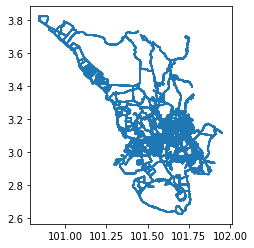

In [27]:
traffic_flow.plot()

## Network Creation

In [56]:
kl_selangor_graph = nx.Graph()
#geoms =[shape(feature['geometry']) for feature in fiona.open("msia_routes_kl/msia_routes_kl.shp")]
geoms = traffic_flow['geometry']
weights = traffic_flow['road_condition']
import itertools
# create a Graph
import networkx as nx

kl_selangor_graph_distance = nx.Graph()
kl_selangor_graph_roadCondition = nx.Graph()
graph_nodes = []


for row in traffic_flow.iterrows():
    #print(list(zip(row[1]['start_point'].coords.xy)))
    if row[1]['geometry'].geom_type == 'LineString':
        for seg_start, seg_end in zip(list(row[1]['geometry'].coords),list(row[1]['geometry'].coords)[1:]):
            seg_start_gps = (seg_start[1], seg_start[0])
            seg_end_gps = (seg_end[1], seg_end[0])
            #print(seg_start_gps)
            kl_selangor_graph_distance.add_nodes_from([seg_start_gps, seg_end_gps])
            kl_selangor_graph_distance.add_edge(seg_start_gps, seg_end_gps, weight=float(row[1]['TMC_LE']))
            kl_selangor_graph_roadCondition.add_nodes_from([seg_start_gps, seg_end_gps])
            kl_selangor_graph_roadCondition.add_edge(seg_start_gps, seg_end_gps, weight=float(row[1]['road_condition']))
            #graph_nodes.append(Point(seg_start_gps))
            #graph_nodes.append(Point(seg_end_gps))
    elif row[1]['geometry'].geom_type == 'MultiLineString':
        for line_part in row[1]['geometry']:
            for seg_start, seg_end in zip(list(line_part.coords),list(line_part.coords)[1:]):
                seg_start_gps = (seg_start[1], seg_start[0])
                seg_end_gps = (seg_end[1], seg_end[0])
                #print(seg_start_gps)
                kl_selangor_graph_distance.add_nodes_from([seg_start_gps, seg_end_gps])
                kl_selangor_graph_distance.add_edge(seg_start_gps, seg_end_gps, weight=float(row[1]['TMC_LE']))
                kl_selangor_graph_roadCondition.add_nodes_from([seg_start_gps, seg_end_gps])
                kl_selangor_graph_roadCondition.add_edge(seg_start_gps, seg_end_gps, weight=float(row[1]['road_condition']))
               
    

In [57]:
print(len(kl_selangor_graph_distance))
print(len(kl_selangor_graph_roadCondition))

144316
144316


In [14]:
list(kl_selangor_graph.nodes)

[(3.01689, 101.37124),
 (3.01698, 101.37123),
 (3.01712, 101.37122),
 (3.01738, 101.37118),
 (3.01771, 101.37113),
 (3.01821, 101.37103),
 (3.01876, 101.37092),
 (3.01932, 101.37081),
 (3.01971, 101.37073),
 (3.02017, 101.37065),
 (3.02062, 101.37057),
 (3.02096, 101.37054),
 (3.0213, 101.37053),
 (3.02175, 101.37056),
 (3.02199, 101.3706),
 (3.02219, 101.37065),
 (3.02239, 101.37072),
 (3.02258, 101.3708),
 (3.02264, 101.37082),
 (3.02281, 101.37091),
 (3.02301, 101.37102),
 (3.02329, 101.37121),
 (3.02364, 101.37149),
 (3.02414, 101.37194),
 (3.02482, 101.37258),
 (3.02507, 101.37282),
 (3.02555, 101.37326),
 (3.02565, 101.37335),
 (3.02586, 101.37355),
 (3.0263, 101.37396),
 (3.02654, 101.3742),
 (3.02702, 101.37464),
 (3.02741, 101.37499),
 (3.02782, 101.37533),
 (3.02825, 101.37567),
 (3.02901, 101.37623),
 (3.02912, 101.37631),
 (3.0299, 101.37688),
 (3.03135, 101.37799),
 (3.0319, 101.37842),
 (3.03213, 101.3786),
 (3.03267, 101.37904),
 (3.03328, 101.3796),
 (3.0349, 101.38112)

C:\Users\tanji\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\tanji\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


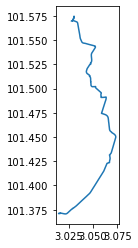

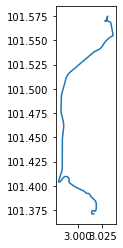

In [58]:
origin = (3.01689, 101.37124)
destination = (2.97395, 101.68976)
destination = (3.02693, 101.57018)

route1 = nx.dijkstra_path(kl_selangor_graph_distance, origin, destination)
route2 = nx.dijkstra_path(kl_selangor_graph_roadCondition, origin, destination)

route1_arr_lat = []
route1_arr_lon = []

for element in route1:
    route1_arr_lat.append(element[1])
    route1_arr_lon.append(element[0])
    
route2_arr_lat = []
route2_arr_lon = []

for element in route2:
    route2_arr_lat.append(element[1])
    route2_arr_lon.append(element[0])
    
    
import geopandas as gpd
from shapely.geometry import Polygon
polygon_geom = LineString(zip(route1_arr_lon, route1_arr_lat))
crs = {'init': 'epsg:4326'}
route1_gdf = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])
route1_gdf.plot()

import geopandas as gpd
from shapely.geometry import Polygon
polygon_geom = LineString(zip(route2_arr_lon, route2_arr_lat))
crs = {'init': 'epsg:4326'}
route2_gdf = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])
route2_gdf.plot()

In [59]:
kl_selangor_map = folium.Map(location=[3.027020, 101.570559], zoom_start= 10)
folium.PolyLine(route1, color="blue", weight=10, opacity=1).add_to(kl_selangor_map)
folium.PolyLine(route2, color="red", weight=5, opacity=0.5).add_to(kl_selangor_map)
kl_selangor_map


In [ ]:
print(len(G))

In [31]:
(3.027020, 101.570559) in list(kl_selangor_graph_distance.nodes)

False

In [47]:
from shapely.geometry import Point, MultiPoint
home = Point(101.570559,3.027020)
home = Point(3.027020, 101.570559)
print(home)
graph_nodes = []
for element in kl_selangor_graph_distance.nodes:
    #print(element)
    graph_nodes.append(Point(element))
#nearest = nearest_points(home, graph_nodes)
[o.wkt for o in nearest_points(home, MultiPoint(graph_nodes))]
#nearest = nearest_points(home, list(kl_selangor_graph_distance.nodes))

POINT (3.02702 101.570559)


['POINT (3.02702 101.570559)', 'POINT (3.02693 101.57018)']